In [1]:
from selenium import webdriver
import time
import csv
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A function that uses selenium and chromedriver to get reviews for a amazon product.
url is the link the account

In [ ]:
def scrape(url):
    #open the browser and visit the url
    driver = webdriver.Chrome('./chromedriver')
    driver.get(url)
    time.sleep(4)
    driver.find_element_by_xpath("//a[@data-hook='see-all-reviews-link-foot']").click()
    time.sleep(3)

    fw=open('reviews_amz4.csv','w',encoding='utf8')
    writer=csv.writer(fw,lineterminator='\n') #create a csv writer for this file
    while(True):

        reviews=driver.find_elements_by_xpath("//div[@class='a-row a-spacing-small review-data']")
        stars=driver.find_elements_by_xpath(".//i[@data-hook='review-star-rating' or @data-hook='cmps-review-star-rating']")  
       
        for i in range(len(reviews)):
            textData, starData='NA' , 'NA'
            try:
                textData=reviews[i].text 
            except:
                print('No reviews')
                
            try:
                starData=stars[i].get_attribute("class")
                starData=re.sub('[a-zA-Z\-\s+]','',starData)              
            except:
                print('No ratings')
                  
            i+=1
                
            if textData!='NA' or starData!='NA':
                writer.writerow([textData, starData])
        
        try:
            nextPageBtn=driver.find_element_by_xpath("//li[@class='a-last']")
            
        except:
            break
                 
        nextPageBtn.click()
        time.sleep(4)

    fw.close()
    driver.close()
    
    return

In [ ]:
#url = 'https://www.amazon.com/Gildan-Little-Hooded-Youth-Sweatshirt/dp/B076C8F7G1/ref=pd_rhf_ee_s_pd_crcd_0_6/138-3327149-6208232?_encoding=UTF8&pd_rd_i=B076C3LH9W&pd_rd_r=4fb30fb2-0cb3-43c6-8020-8cdc4de49884&pd_rd_w=34zgQ&pd_rd_wg=NDqj7&pf_rd_p=8019ba47-0a12-4976-b76b-5c932d60db6f&pf_rd_r=T1SAFXZAYEBT63ZRTG94&refRID=T1SAFXZAYEBT63ZRTG94&th=1&psc=1'
url='https://www.amazon.com/Sennheiser-Momentum-Cancelling-Headphones-Functionality/dp/B07VW98ZKG/ref=cm_cr_arp_d_product_top?ie=UTF8'

In [ ]:
scrape(url)

In [2]:
df = pd.read_csv("reviews_amz4.csv", names = ['reviews','stars'])

In [5]:
print("A portion of the Reviews for this product are: \n ", df.head())

A portion of the Reviews for this product are: 
                                               reviews  stars
0  I am comparing the Momentum 3 with Sony WH-100...      4
1  An unbiased review that represents my search f...      3
2  I'm really bummed out about these. As soon as ...      2
3  Price - Both are currently $399USD at the time...      4
4  To give some perspective, I’m the type of cons...      2


# TOTAL NO OF REVIEWS

In [6]:
total_reviews = df.shape[0]

In [7]:
print("The total no of reviews are :", total_reviews)

The total no of reviews are : 175


In [8]:
df.dtypes

reviews    object
stars       int64
dtype: object

In [9]:
df.isnull().sum()

reviews    0
stars      0
dtype: int64

In [44]:
df.head()

reviews  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  175 non-null    object
 1   stars    175 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [10]:
df.stars.value_counts()

5    79
4    32
3    31
2    18
1    15
Name: stars, dtype: int64

# FILL NA VALUES IN REVIEWS AND STARS COLUMNS

In [11]:
df['reviews'].fillna("", inplace = True)

In [ ]:
df['stars'].fillna(df['stars'].mode(), inplace=True)

# Exploratory Data Analysis of Stars given to the reviews

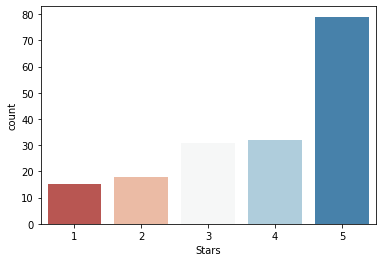

In [13]:
# Exploratory Data Analysis of Stars given to the reviews
sns.countplot(x='stars', data=df, palette='RdBu')
plt.xlabel('Stars')
plt.show()

In [ ]:
# KDNuggets

https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.html

We quantify this sentiment with a positive or negative value, called polarity. 
The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

Usually, sentiment analysis works best on text that has a subjective context than on text with only an objective context. 

Objective text usually depicts some normal statements or facts without expressing any emotion, feelings, or mood. 

Subjective text contains text that is usually expressed by a human having typical moods, emotions, and feelings.



In [ ]:
# 2. Sentiment Analysis with TextBlob

    Typically, the polarity and subjectivity scores have a normalized scale as compared to Afinn. 
    The polarity score is a float within the range [-1.0, 1.0]. 
    The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [14]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
Polarity_score = [round(TextBlob(review).sentiment.polarity, 3) for review in df['reviews']]

In [15]:
df['Polarity']= Polarity_score

In [16]:
sentiment = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in Polarity_score]


In [17]:
df['Sentiment'] = sentiment

In [18]:
df.head()

,reviews,stars,Polarity,Sentiment
0,I am comparing the Momentum 3 with Sony WH-100...,4,0.098,positive
1,An unbiased review that represents my search f...,3,0.238,positive
2,I'm really bummed out about these. As soon as ...,2,0.308,positive
3,Price - Both are currently $399USD at the time...,4,0.182,positive
4,"To give some perspective, I’m the type of cons...",2,-0.036,negative


# SENTIMENT DISTRIBUTION

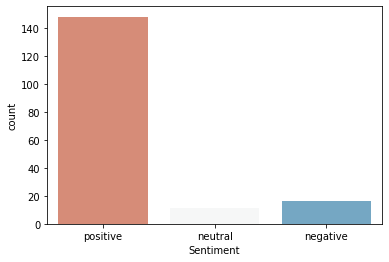

In [19]:
sns.countplot(x='Sentiment', order=['positive', 'neutral', 'negative'], data=df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

# POLARITY DISTRIBUTION

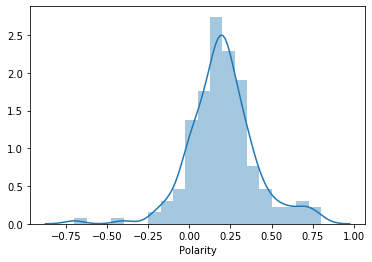

In [20]:
sns.distplot(df['Polarity'])

In [21]:
Subjectivity_score = [round(TextBlob(review).sentiment.subjectivity, 3) for review in df['reviews']]

In [22]:
df['Subjectivity'] = Subjectivity_score

In [23]:
df.head()

,reviews,stars,Polarity,Sentiment,Subjectivity
0,I am comparing the Momentum 3 with Sony WH-100...,4,0.098,positive,0.500
1,An unbiased review that represents my search f...,3,0.238,positive,0.472
2,I'm really bummed out about these. As soon as ...,2,0.308,positive,0.533
3,Price - Both are currently $399USD at the time...,4,0.182,positive,0.492
4,"To give some perspective, I’m the type of cons...",2,-0.036,negative,0.519


# SUBJECTIVITY SCORE DISTRIBUTION

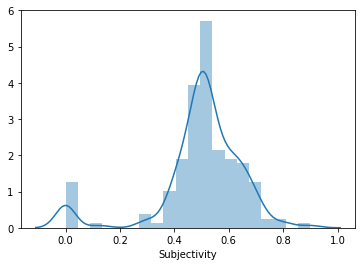

In [24]:
sns.distplot(df['Subjectivity'])

In [25]:
df['Sentiment'].value_counts()

positive    148
negative     16
neutral      11
Name: Sentiment, dtype: int64

# SUBJECTIVITY AND POLARITY SCORES HUED TO SENTIMENT CATEGORY

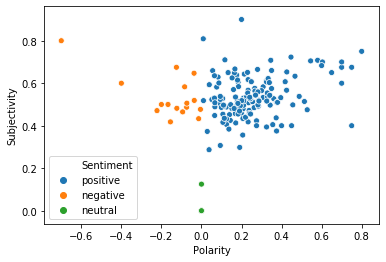

In [26]:
sns.scatterplot(x='Polarity', y = 'Subjectivity', hue='Sentiment', data = df)

In [27]:
pos_count = sum(df['Sentiment']=='positive')

In [77]:
pos_count

148

In [28]:
neg_count = sum(df['Sentiment']=='negative')

In [29]:
neu_count = sum(df['Sentiment']=='neutral')

# SENTIMENT DISTRIBUTION

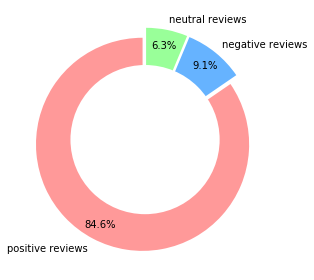

In [30]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['positive reviews', 'negative reviews', 'neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()


# POSITIVE REVIEW PERCENTAGE

In [31]:
pos_percent = round((pos_count/total_reviews)*100, 1)

In [32]:
print("The Percentage of Positive Reviews is: ", pos_percent, "%")

The Percentage of Positive Reviews is:  84.6 %


In [ ]:
AND THEN THE NEXT FUNC WHICH I WILL DISPLAY IS MOST POSITIVE REVIEW

# NEGATIVE REVIEW PERCENTAGE

In [84]:
neg_percent = round((neg_count/total_reviews)*100, 1)

In [90]:
print("The Percentage of Negative Reviews is: ", neg_percent, "%")

The Percentage of Negative Reviews is:  9.1 %


In [ ]:
AND NOW I WILL DISPLAY THE MOST CRITICAL/NEGATIVE REVIEW

In [42]:
pd.set_option('display.max_colwidth', None)

# MOST POSITIVE REVIEW OF THE PRODUCT

In [36]:
# Most Positive Review
pos_max = df.loc[df['Polarity']==max(df['Polarity'])]

In [37]:
most_positive_review = pos_max['reviews']

In [45]:
pos_max

,reviews,stars,Polarity,Sentiment,Subjectivity
109,Great Product,5,0.8,positive,0.75


In [38]:
most_positive_review

109    Great Product
Name: reviews, dtype: object

# MOST CRITICAL/NEGATIVE REVIEW OF THE PRODUCT

In [39]:
# Most Negative Review
neg_max = df.loc[df['Polarity']==min(df['Polarity'])]

In [43]:
neg_max

,reviews,stars,Polarity,Sentiment,Subjectivity
110,The noise canceling is terrible and poor battery life,3,-0.7,negative,0.8


In [40]:
most_negative_review = neg_max['reviews']

In [41]:
most_negative_review

110    The noise canceling is terrible and poor battery life
Name: reviews, dtype: object

# WORD COUNT

In [36]:
df["word_count"] = df["reviews"].apply(lambda review: len(review.split()))

In [37]:
df.head()

,reviews,stars,Sentiment,Subjectivity,Polarity,word_count
0,I am comparing the Momentum 3 with Sony WH-100...,4,positive,0.500,0.098,309
1,An unbiased review that represents my search f...,3,positive,0.472,0.238,1170
2,I'm really bummed out about these. As soon as ...,2,positive,0.533,0.308,91
3,Price - Both are currently $399USD at the time...,4,positive,0.492,0.182,1599
4,"To give some perspective, I’m the type of cons...",2,negative,0.519,-0.036,363


# WORD COUNT DISTRIBUTION FOR REVIEWS FOR DIFFERENT NUMBER OF STARS

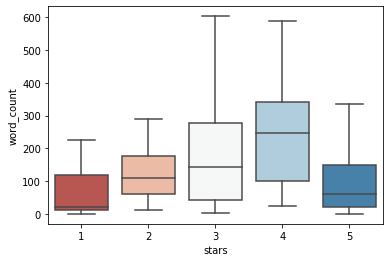

In [38]:
sns.boxplot(x='stars',y='word_count', data=df, palette='RdBu', showfliers=False)
plt.show()

# MEDIAN OF WORD COUNT FOR DIFFERENT STARRED REVIEW

In [39]:
df[df.stars==5].word_count.median()

61.0

In [40]:
df[df.stars==4].word_count.median()

246.0

In [41]:
df[df.stars==3].word_count.median()

145.0

In [42]:
df[df.stars==2].word_count.median()

109.0

In [43]:
df[df.stars==1].word_count.median()

23.0

# REVIEWS WORD COUNT DISTRIBUTION

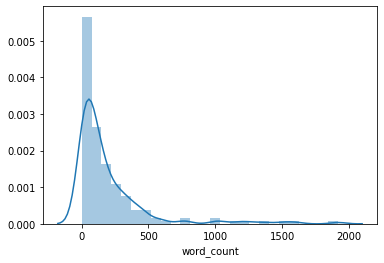

In [44]:
sns.distplot(df['word_count'])

In [45]:
df.head()

,reviews,stars,Sentiment,Subjectivity,Polarity,word_count
0,I am comparing the Momentum 3 with Sony WH-100...,4,positive,0.500,0.098,309
1,An unbiased review that represents my search f...,3,positive,0.472,0.238,1170
2,I'm really bummed out about these. As soon as ...,2,positive,0.533,0.308,91
3,Price - Both are currently $399USD at the time...,4,positive,0.492,0.182,1599
4,"To give some perspective, I’m the type of cons...",2,negative,0.519,-0.036,363


## GOOD REVIEWS VS BAD REVIEWS POLARITY BOXPLOT

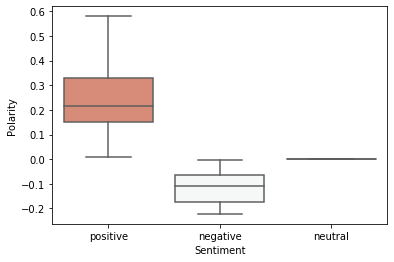

In [46]:
sns.boxplot(x='Sentiment',y='Polarity', data=df, palette='RdBu', showfliers=False)
plt.show()

In [ ]:
FUNCTIONS


# Total no of reviews for this product +
# Star distribution of reviews +
# Subjectivity score +
# Polarity score +
# Share of Sentiment - Positive, Negative, Neutral Reviews +
# Positive, Negative, Neutral Reviews Boxplot Polarity Distribution +
# Distribution of Stars given for the product +
# Positive Reviews Wordcloud +
#  Negative Reviews Wordcloud +
# Distribution of Subjectivity +
# Histogram/Distribution of Polarity score +
# Distribution of no of words used in the review +
# Most frequently used words +
# Median no. of words per review +
# Median word count for every 5 star, 4 star, 3 star, 2 star, 1 star +
# OR boxplot for wordcount for every star rated review +

TOOLS

# Textblog package
# Streamlit 
# Heroku
# Flask


In [97]:
gp = df.groupby(by=['Sentiment'])

In [98]:
positive_reviews = gp.get_group('positive')

In [99]:
negative_reviews = gp.get_group('negative')

In [100]:
neutral_reviews= gp.get_group('neutral')

# WORDCLOUD

In [113]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import re
import string
import matplotlib.pyplot as plt

In [177]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    for rev in data["reviews"]:
        
        text = str(rev).lower()
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        
        # Remove aplha numeric characters
        
        # Remove spaces or empty strings
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

# POSITIVE REVIEWS WORDCLOUD

In [102]:
positive_reviews['reviews']

0      I am comparing the Momentum 3 with Sony WH-100...
1      An unbiased review that represents my search f...
2      I'm really bummed out about these. As soon as ...
3      Price - Both are currently $399USD at the time...
5      Noise cancelling is not strong with these head...
                             ...                        
166    Too much static. Unbearable and intolerable fo...
167    Definitely the best headphones I have ever had...
170    Good product, very good sound quality but medi...
171    Great for classical music lover\r\nIts always ...
172    amazing sound, comfort , design and smells exp...
Name: reviews, Length: 148, dtype: object

In [182]:
positive_wordcloud = WordCloud(width=900, height=500).generate(wordcloud(positive_reviews)[0])

In [183]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

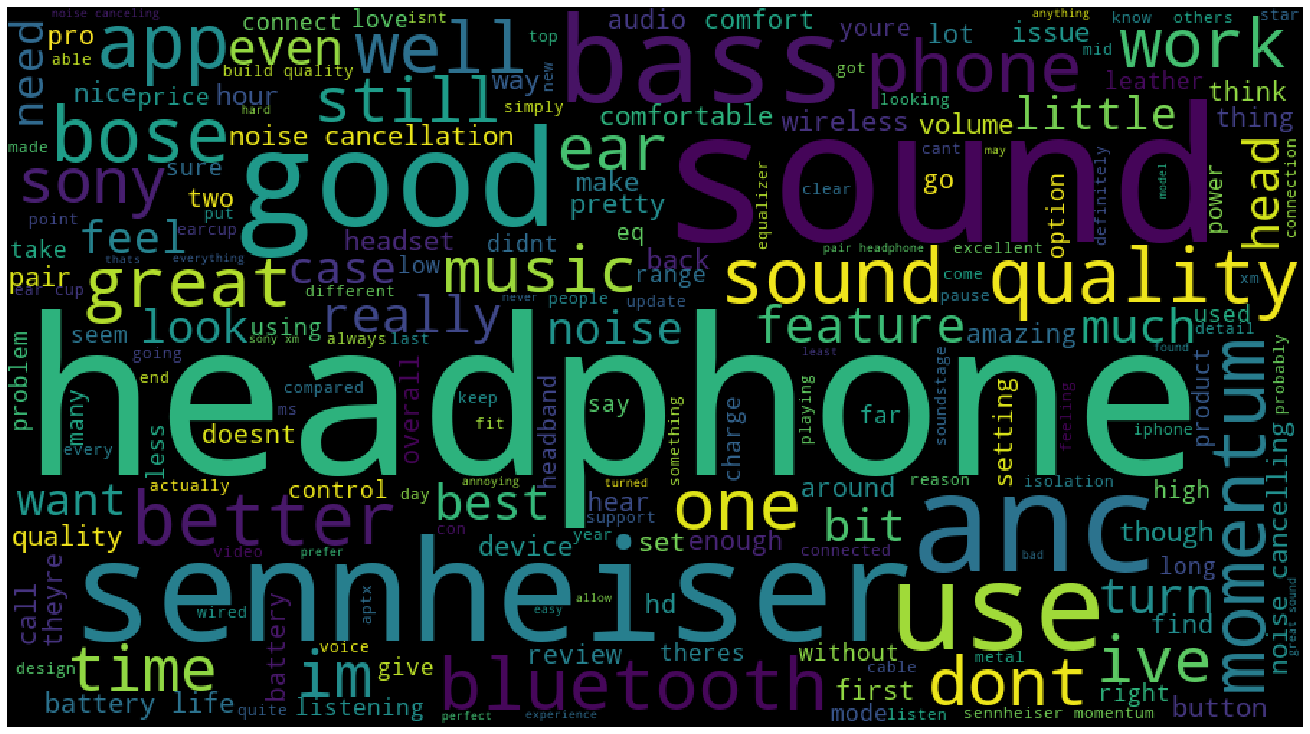

<Figure size 432x288 with 0 Axes>

In [184]:
plot_Cloud(positive_wordcloud)

In [ ]:
# Now let's take a look at the most used words in the Positive Reviews

# POSITIVE REVIEWS MOST FREQUENT WORDS

In [196]:
len(wordcloud(positive_reviews)[1])

17004

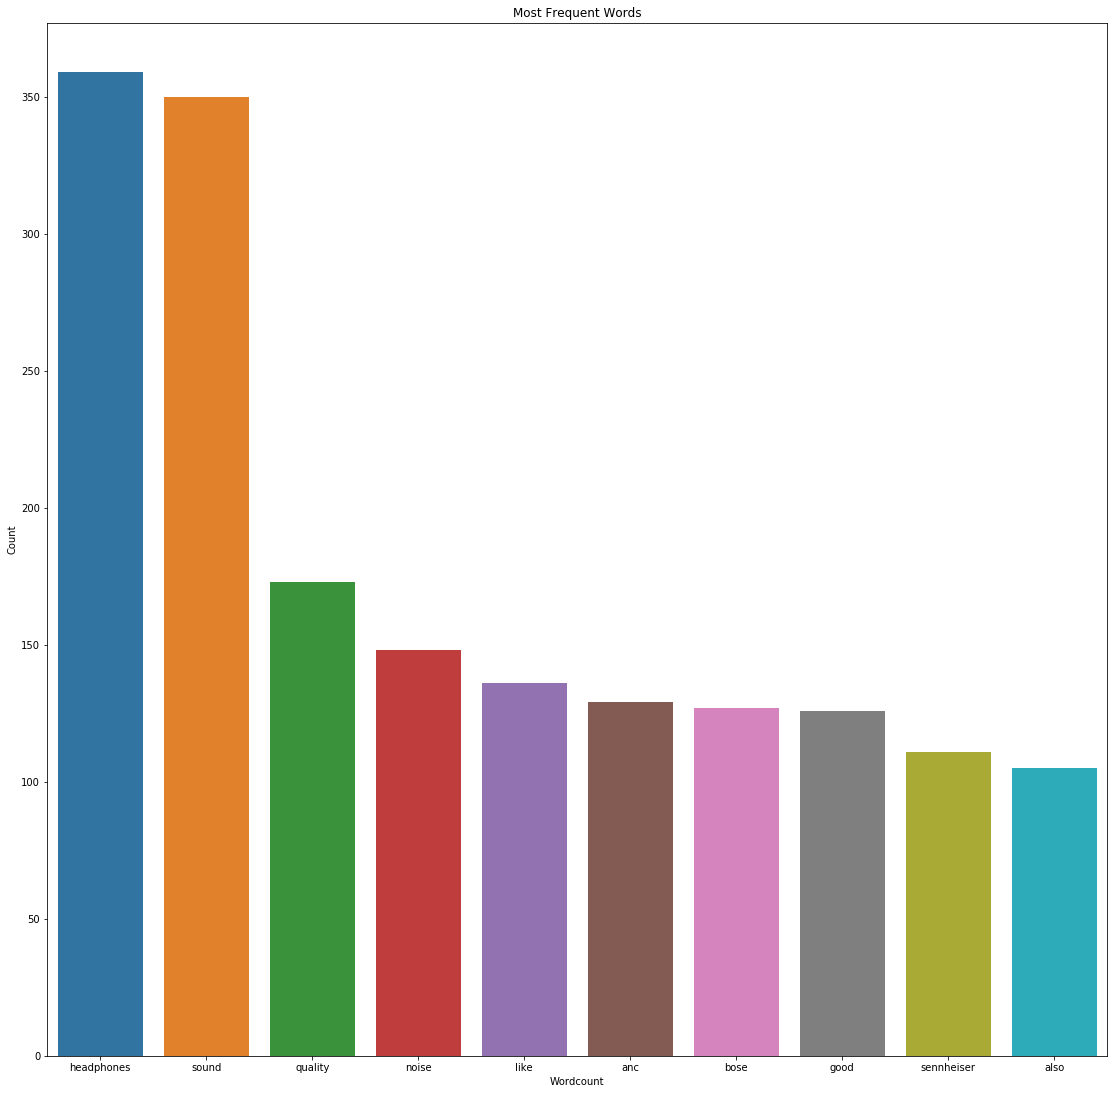

In [202]:
aa = nltk.FreqDist(wordcloud(positive_reviews)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,19))
plt.title('Most Frequent Words')
ax = sns.barplot(data=dd, x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [203]:
dd

,Wordcount,Count
78,headphones,359
12,sound,350
115,quality,173
39,noise,148
70,like,136
288,anc,129
178,bose,127
163,good,126
121,sennheiser,111
4,also,105


# POSITIVE REVIEWS DATAFRAME ALONG WITH THE SENTIMENT SCORE/POLARITY

In [187]:
positive_reviews[['reviews','Polarity']]

,reviews,Polarity
0,I am comparing the Momentum 3 with Sony WH-100...,0.098
1,An unbiased review that represents my search f...,0.238
2,I'm really bummed out about these. As soon as ...,0.308
3,Price - Both are currently $399USD at the time...,0.182
5,Noise cancelling is not strong with these head...,0.198
...,...,...
166,Too much static. Unbearable and intolerable fo...,0.447
167,Definitely the best headphones I have ever had...,0.275
170,"Good product, very good sound quality but medi...",0.346
171,Great for classical music lover\r\nIts always ...,0.160


# NEGATIVE REVIEWS WORDCLOUD

In [104]:
negative_reviews['reviews']

4      To give some perspective, I’m the type of cons...
17     I had the previous gen momentums, and was init...
30     I have set of warn in HD580 so I can say the s...
31     I purchased these headphones for computer use....
46     Consistent dropouts from bluetooth connection ...
48     Bought this item with international shipping (...
61     Accidentally clipped my finger when I was unfo...
77     I PAID FOR A 3 YEAR WARRANTY THROUGH AMAZON PR...
80     I love this product strictly for the music qua...
81     Defective product wont send a replacement poor...
93                                     heavy on the head
94     Got someones returned dirty used pair of headp...
105    Seems to have issues with initial connection. ...
110    The noise canceling is terrible and poor batte...
126    These sound amazing. They are comfortable. I l...
162    Smart Pause persistently pauses playback every...
Name: reviews, dtype: object

In [189]:
negative_wordcloud = WordCloud(width=900, height=500).generate(wordcloud(negative_reviews)[0])

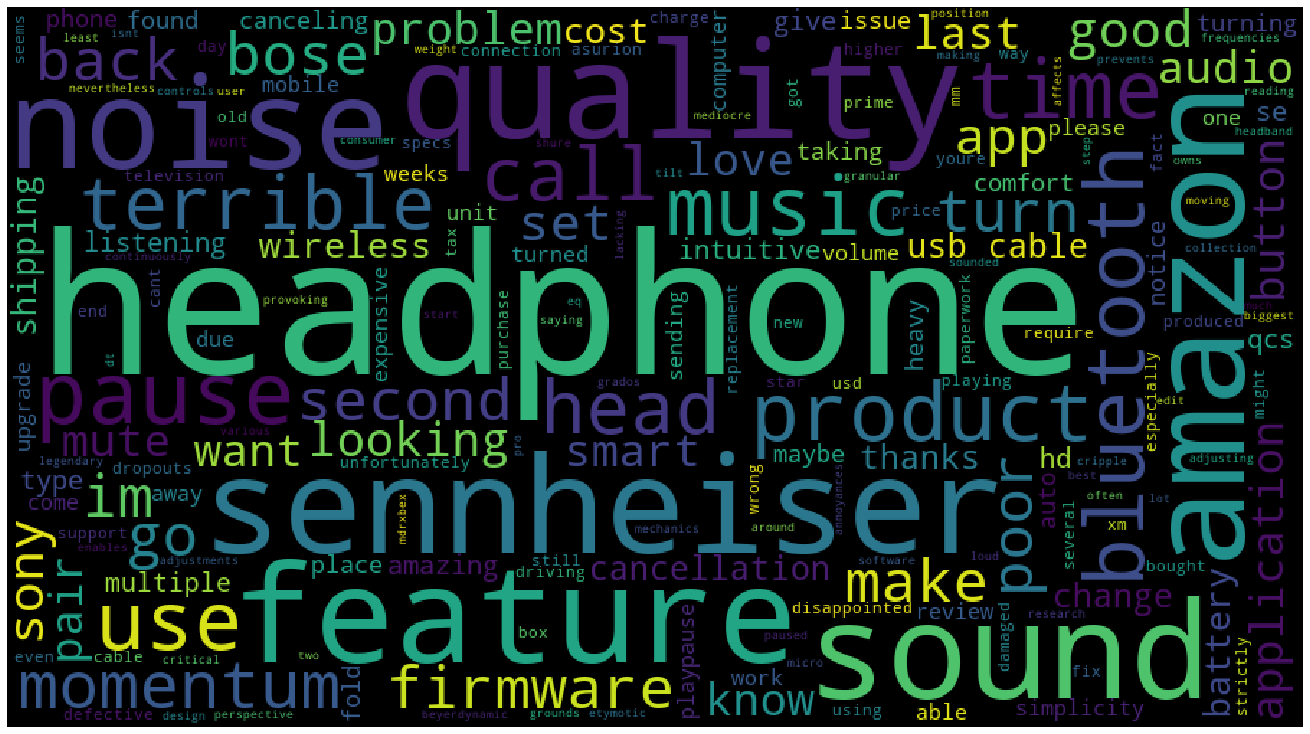

<Figure size 432x288 with 0 Axes>

In [190]:
plot_Cloud(negative_wordcloud)

# NEGATIVE REVIEWS MOST FREQUENT WORDS

In [194]:
len(wordcloud(negative_reviews)[1])

807

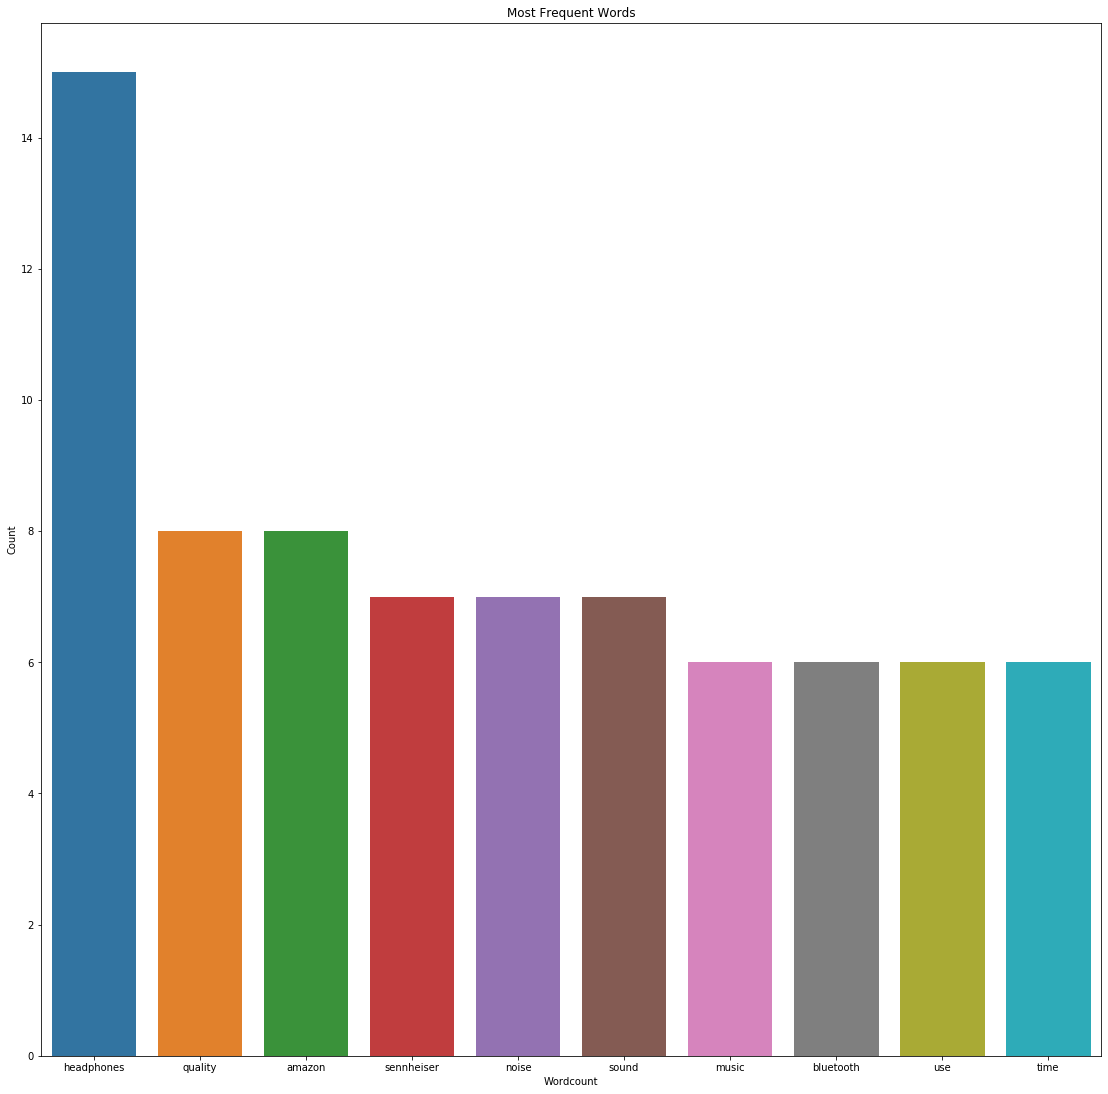

In [197]:
aa = nltk.FreqDist(wordcloud(negative_reviews)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,19))
plt.title('Most Frequent Words')
ax = sns.barplot(data=dd, x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [201]:
dd

,Wordcount,Count
37,headphones,15
42,quality,8
299,amazon,8
25,sennheiser,7
64,noise,7
180,sound,7
28,music,6
36,bluetooth,6
51,use,6
75,time,6


# NEGATIVE REVIEWS DATAFRAME ALONG WITH THE SENTIMENT SCORE/POLARITY

In [188]:
negative_reviews[['reviews','Polarity']]

,reviews,Polarity
4,"To give some perspective, I’m the type of cons...",-0.036
17,"I had the previous gen momentums, and was init...",-0.014
30,I have set of warn in HD580 so I can say the s...,-0.123
31,I purchased these headphones for computer use....,-0.074
46,Consistent dropouts from bluetooth connection ...,-0.073
48,Bought this item with international shipping (...,-0.094
61,Accidentally clipped my finger when I was unfo...,-0.084
77,I PAID FOR A 3 YEAR WARRANTY THROUGH AMAZON PR...,-0.005
80,I love this product strictly for the music qua...,-0.125
81,Defective product wont send a replacement poor...,-0.400
